In [1]:
import networkx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds_df = pd.read_csv('interactions.csv')

print(ds_df)

          Character       Listener  Interaction Count
0          Fridolin       daughter                  2
1          Fridolin      Albertina                 42
2         Albertina       Fridolin                 29
3          Fridolin       Marianne                 16
4          Marianne       Fridolin                  8
5          Fridolin        unknown                 24
6             Mizzi       Fridolin                 14
7          Fridolin          Mizzi                  5
8             Mizzi        unknown                  1
9          Fridolin     Nachtigall                 39
10       Nachtigall       Fridolin                 44
11          Gibiser       Fridolin                 16
12         Fridolin        Gibiser                 17
13          Gibiser      Gentlemen                  4
14        Gentlemen        Gibiser                  3
15        Pierrette        Gibiser                  2
16          Gibiser      Pierrette                  3
17         Fridolin       Fr

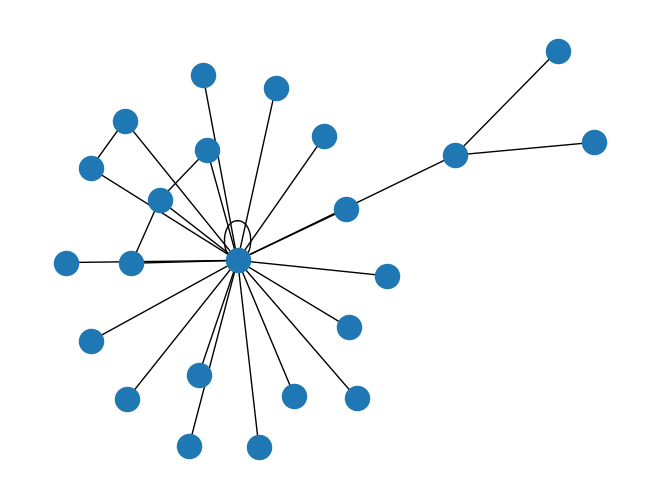

In [3]:
G = networkx.from_pandas_edgelist(ds_df, 'Character', 'Listener', 'Interaction Count')
networkx.write_graphml(G, 'DS-network.graphml')
networkx.draw(G)

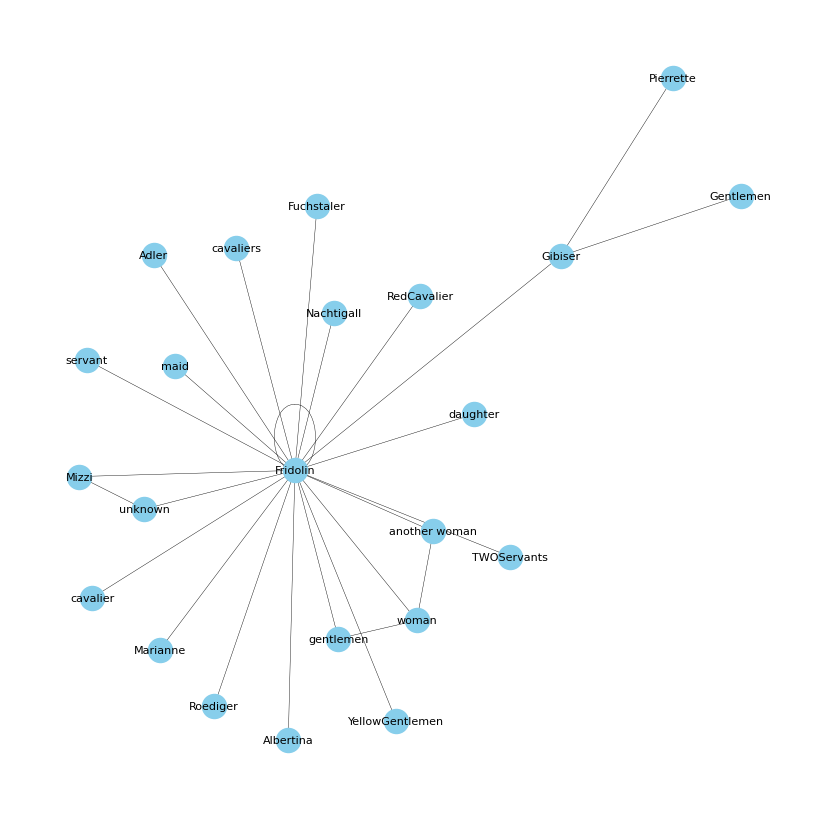

In [4]:
plt.figure(figsize=(8,8))
networkx.draw(G, with_labels=True, node_color='skyblue', width=.3, font_size=8)

Who has the most number of connections in the network?

In [5]:
networkx.degree(G)

DegreeView({'Fridolin': 22, 'daughter': 1, 'Albertina': 1, 'Marianne': 1, 'unknown': 2, 'Mizzi': 2, 'Nachtigall': 1, 'Gibiser': 3, 'Gentlemen': 1, 'Pierrette': 1, 'TWOServants': 1, 'woman': 3, 'another woman': 2, 'cavalier': 1, 'cavaliers': 1, 'YellowGentlemen': 1, 'gentlemen': 2, 'RedCavalier': 1, 'servant': 1, 'maid': 1, 'Fuchstaler': 1, 'Roediger': 1, 'Adler': 1})

Make the degree values a dictionary, then add it as a network “attribute” with networkx.set_node_attributes()

In [6]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

Make a Pandas dataframe from the degree data G.nodes(data='degree'), then sort from highest to lowest

In [7]:
degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df

,node,degree
0,Fridolin,22
7,Gibiser,3
11,woman,3
5,Mizzi,2
16,gentlemen,2
12,another woman,2
4,unknown,2
3,Marianne,1
15,YellowGentlemen,1
21,Roediger,1


Plot the nodes with the highest degree values

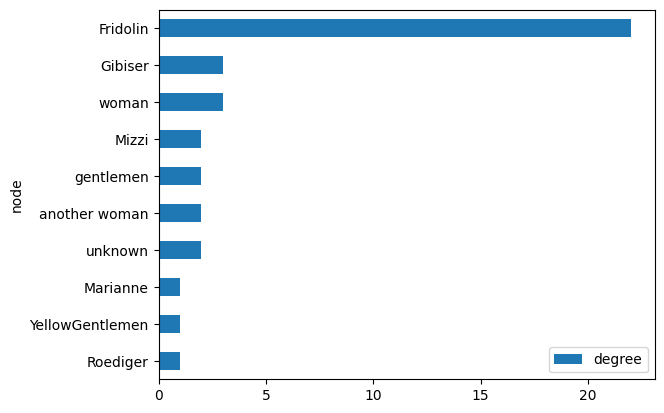

In [8]:
num_nodes_to_inspect = 10
degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh').invert_yaxis()